In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Libraries Info

In [3]:
print('Numpy version - ',np.__version__)
print('Pandas version - ',pd.__version__)
print('Matplotlib version - ',matplotlib.__version__)
print('Seaborn version - ',sns.__version__)
print('sklearn version - ',sklearn.__version__)
print('statsmodel version - ',statsmodels.__version__)
! python --version

Numpy version -  1.26.4
Pandas version -  2.2.2
Matplotlib version -  3.9.2
Seaborn version -  0.13.2
sklearn version -  1.5.1
statsmodel version -  0.14.2
Python 3.12.7


## Reading and Understanding the Data

In [5]:
days = pd.read_csv("day.csv")

In [6]:
days.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
days.shape

(730, 16)

In [8]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
days.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Fixing Rows and Columns
* Delete columns: Delete columns irrelevant to this analysis
* Delete Rows: Delete all outliers, duplicate rows, and null rows

In [11]:
## Identify all columns who have more null values
((days.isnull().sum()/len(days))*100).sort_values()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [12]:
## instant is index and has relevance.
## dteday is not needed as the month and year values are available in the data and is not relevant in not relevant in model building
## cnt is the target variable which is a sum of casual and registered these columns are not relevant in model building
columns_not_relevant = ['instant','dteday', 'casual','registered']

In [13]:
## Dropping all the columns which are identified to be not much useful in model building
days = days.drop(columns_not_relevant, axis = 1)

In [14]:
## Check for duplicate columns 
days.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
## Check for duplicate rows and remove 
days[days.duplicated()]

Empty DataFrame
Columns: [season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt]
Index: []

## Outlier Treatment
 Identify Ouliers and remove if there are any.

<Axes: ylabel='windspeed'>

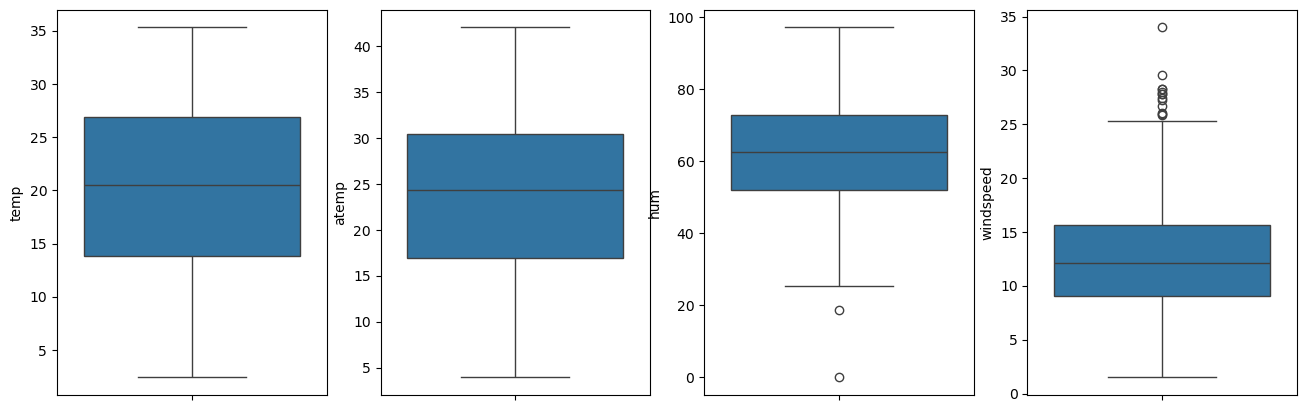

In [17]:
fig, ax = plt.subplots(ncols=4,figsize=(16,5))
sns.boxplot(days.temp,ax=ax[0])
sns.boxplot(days.atemp,ax=ax[1])
sns.boxplot(days.hum,ax=ax[2])
sns.boxplot(days.windspeed,ax=ax[3])

### Observations
* From the above box plot there are no significant outlier. Humidity and windspeed data shows some outliers but they seems minimal and will not have an impact on the model. So continuing wihout removing outliers

## Standardizing the data
Data dictionary has definitions of column values which are categorical values. Decode the values from numbers to the actual values as decribed in the data dictionary

In [20]:
season_dict = {1:"spring",2:"summer",3:"fall",4:"winter"}
mnth_dict = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
weekday_dict = {5:'Sunday',6:'Monday',0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday'}
weathersit_dict = {1:'Clear',2:'Cloudy',3:'Light-RainOrSnow',4:'Heavy-RainOrSnow'}

In [21]:
days.season=days.season.map(season_dict)
days.mnth=days.mnth.map(mnth_dict)
days.weathersit=days.weathersit.map(weathersit_dict)
days.weekday=days.weekday.map(weekday_dict)
days.head()

season  yr     mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  January        0     Monday           0     Cloudy  14.110847   
1  spring   0  January        0    Tuesday           0     Cloudy  14.902598   
2  spring   0  January        0  Wednesday           1      Clear   8.050924   
3  spring   0  January        0   Thursday           1      Clear   8.200000   
4  spring   0  January        0     Friday           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [22]:
## Re-usable function which creates  a bar plot as a sub plot with charged off ratio
def barplotAsSubPlot(data,column,title,xlabel,ax,rotation=0):      
    sns.barplot(x=column, y='cnt', data=data,ax=ax)
    ax.set_title(title,weight='bold')
    ax.set_xlabel(xlabel)    
    ax.set_ylabel('Total Rental Bikes')
    ax.tick_params(axis='x', rotation=rotation)

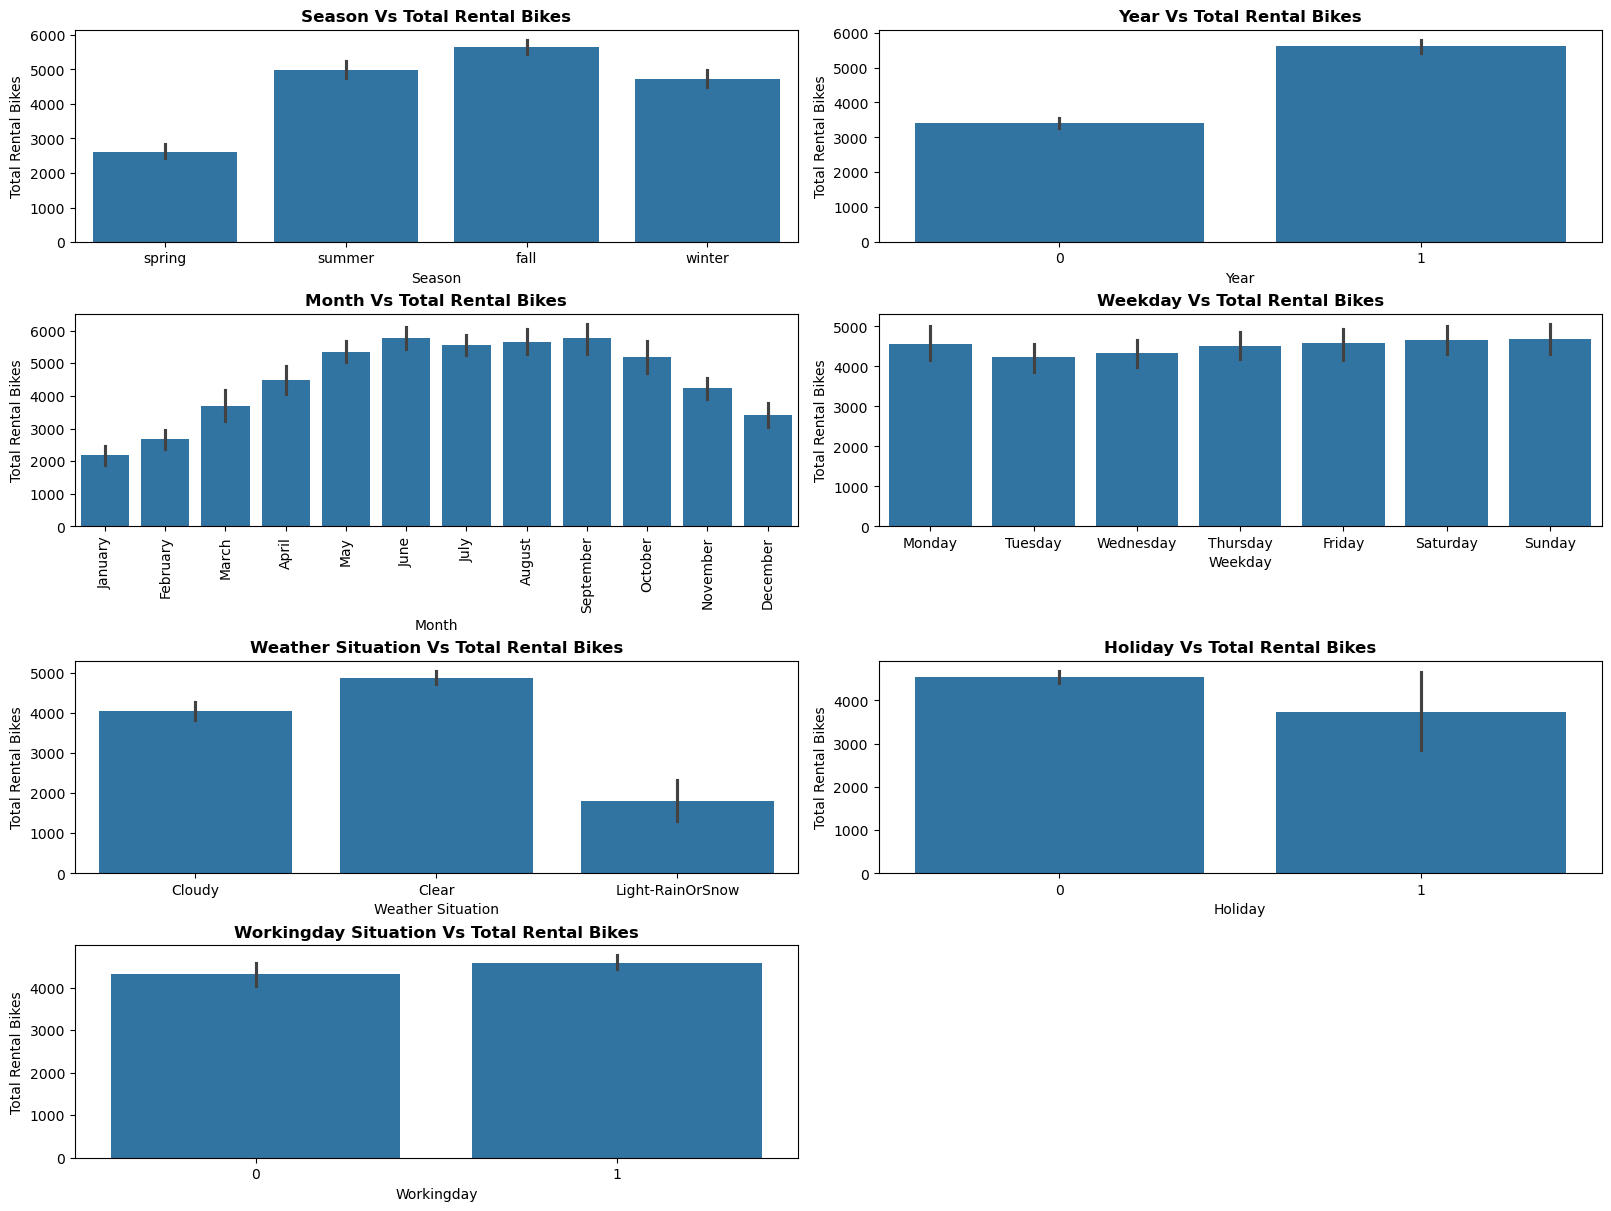

In [23]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(16,12),constrained_layout = True)
barplotAsSubPlot(days,'season','Season Vs Total Rental Bikes','Season',ax[0][0])
barplotAsSubPlot(days,'yr','Year Vs Total Rental Bikes','Year',ax[0][1])
barplotAsSubPlot(days,'mnth','Month Vs Total Rental Bikes','Month',ax[1][0],90)
barplotAsSubPlot(days,'weekday','Weekday Vs Total Rental Bikes','Weekday',ax[1][1])
barplotAsSubPlot(days,'weathersit','Weather Situation Vs Total Rental Bikes','Weather Situation',ax[2][0])
barplotAsSubPlot(days,'holiday','Holiday Vs Total Rental Bikes','Holiday',ax[2][1])
barplotAsSubPlot(days,'workingday','Workingday Vs Total Rental Bikes','Workingday',ax[3][0])
fig.delaxes(ax.flatten()[7])

### Observations
* Rentals are more during fall season
* Rentals are more on a day with Clear weather
* Rentals are more on a holiday day
* June and september have more rentals
* Rentals are little more on a weekday which is neither weekend nor holiday
* Rentals are distributed same accross all the weekdays except saturday where there is an increase compared to other days
* Growth is rentals between 2018 and 2019 

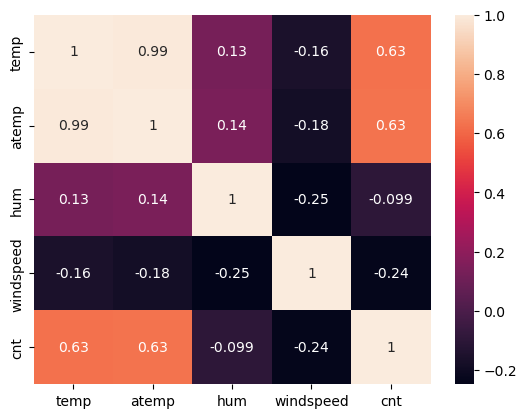

In [25]:
sns.heatmap(days[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.show()

### Observations
* temp and atemp are higly positively correlated.
* temp and atemp are positively with cnt
* windspeed is negatively corrleated with cnt

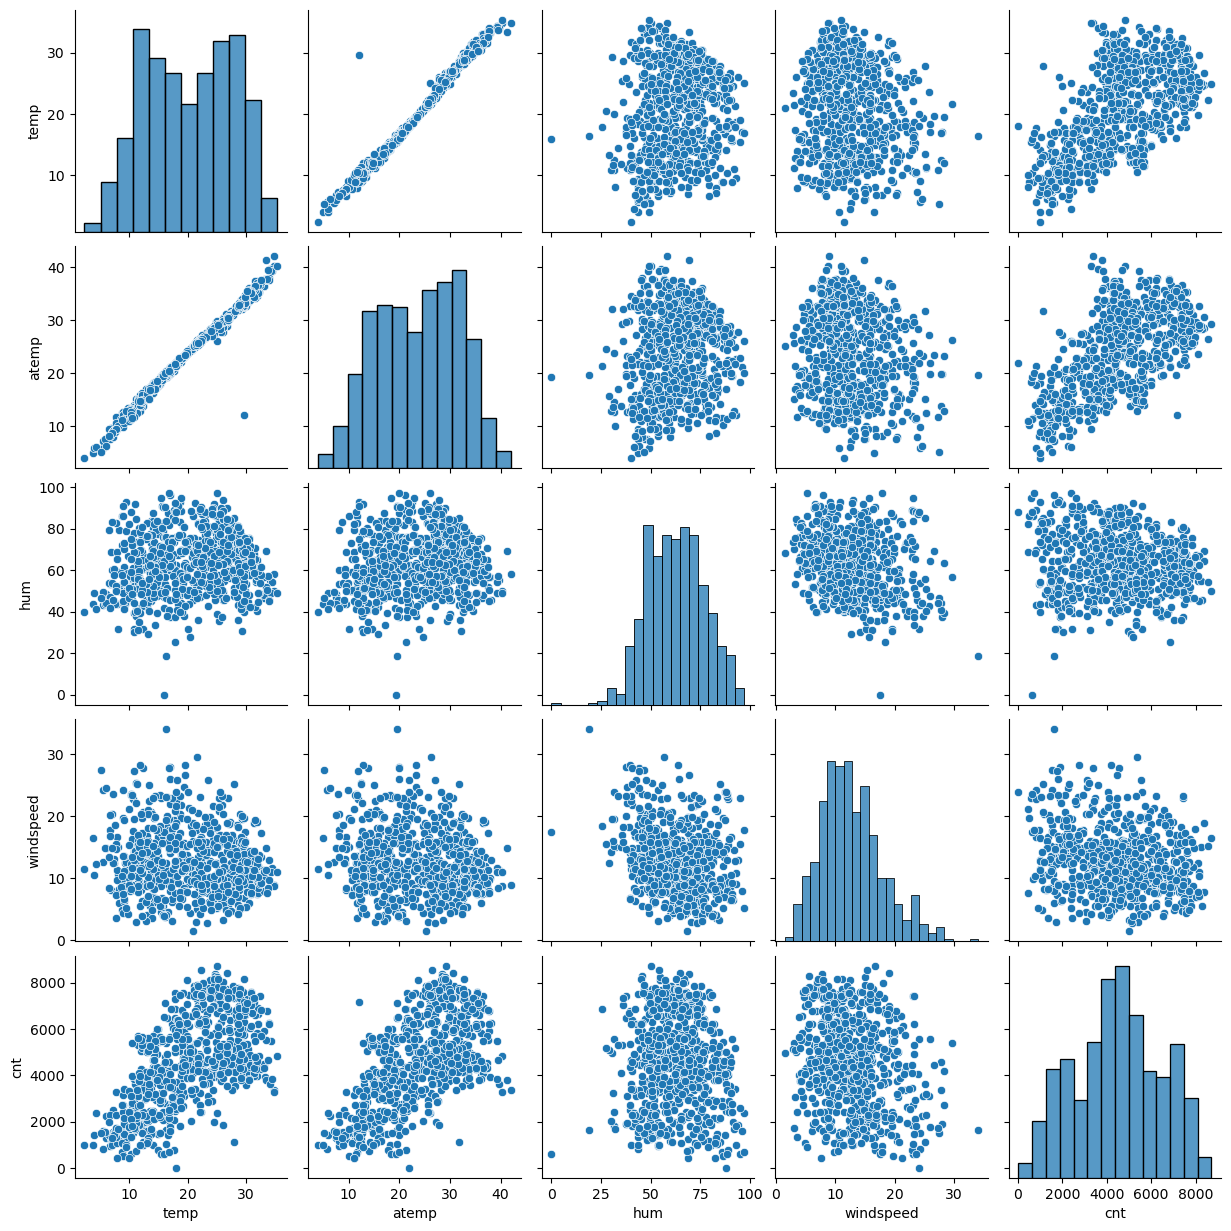

In [27]:
sns.pairplot(days[['temp','atemp','hum','windspeed','cnt']])
plt.show()

In [28]:
## Dropping column atemp as temp and atemp are higly corelated and any one of them can be used for further analysis and model creation
days = days.drop('atemp', axis = 1)

## Data Preparation

In [30]:
# Dummy variable creation for season,month,weekday,weatersit
season_dummies=pd.get_dummies(days.season,drop_first=True, dtype='int')
mnth_dummies=pd.get_dummies(days.mnth,drop_first=True, dtype='int')
weekday_dummies=pd.get_dummies(days.weekday,drop_first=True, dtype='int')
weathersit_dummies=pd.get_dummies(days.weathersit,drop_first=True, dtype='int')

In [31]:
# Merging  dummies with original dataset. 
days = pd.concat([days,season_dummies,mnth_dummies,weekday_dummies,weathersit_dummies],axis=1)

In [32]:
# dropping columns for which dummy values are generated
days = days.drop(['season','mnth','weekday','weathersit'], axis = 1)

In [33]:
days.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           0  14.110847  80.5833  10.749882   985       1   
1   0        0           0  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  October  September  Monday  Saturday  Sunday  \
0       0       0  ...        0          0       1         0       0   
1       0       0  ...        0          0       0         0       0   
2       0       0  ...        0          0       0         0       0   
3       0       0  ...        0          0       0         0       0   
4       0       0  ...        0          0       0         0       0   

   Thursday  Tuesday  Wednesday  Cloudy  Light-RainOrSnow  
0         0        0          0       1                 0  
1         0        1          0       1                 0  
2         0        0          1       0                 0  
3         1        0          0       0                 0  
4         0        0          0       0                 0  

[5 rows x 29 columns]

In [34]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   spring            730 non-null    int32  
 8   summer            730 non-null    int32  
 9   winter            730 non-null    int32  
 10  August            730 non-null    int32  
 11  December          730 non-null    int32  
 12  February          730 non-null    int32  
 13  January           730 non-null    int32  
 14  July              730 non-null    int32  
 15  June              730 non-null    int32  
 16  March             730 non-null    int32  
 1

## Splitting the Data into Training and Testing Sets

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively
days_train, days_test = train_test_split(days, train_size = 0.7, random_state = 100)

### Rescaling the Features

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the numerical columns except the variable with values '0/1'
numeric_variables = ['temp','hum','windspeed','cnt']
days_train[numeric_variables] = scaler.fit_transform(days_train[numeric_variables])

days_test[numeric_variables] = scaler.fit_transform(days_test[numeric_variables])

In [41]:
days_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.468282    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...     October  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.243137    0.247059    0.247059  ...    0.084314   
std      0.224421    0.429398    0.431725    0.431725  ...    0.278131   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

        September      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.133333    0.127451    0.131373    0.143137   
std      0.272166    0.362166    0.340268    0.333805    0.338139    0.350557   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday      Cloudy  Light-RainOrSnow  
count  510.000000  510.000000        510.000000  
mean     0.150980    0.345098          0.029412  
std      0.358381    0.475867          0.169124  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          0.000000  
75%      0.000000    1.000000          0.000000  
max      1.000000    1.000000          1.000000  

[8 rows x 29 columns]

In [42]:
days_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.546074    0.508362    0.418803   
std      0.500809    0.187620    0.459303    0.248645    0.200875    0.187683   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.329310    0.361079    0.284201   
50%      0.000000    0.000000    1.000000    0.545492    0.491299    0.403318   
75%      1.000000    0.000000    1.000000    0.756414    0.650989    0.523975   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...     October  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.517923    0.254545    0.263636    0.236364  ...    0.086364   
std      0.239498    0.436599    0.441609    0.425817  ...    0.281541   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.361045    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.520681    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.687956    1.000000    1.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

        September      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.118182    0.163636    0.177273    0.168182    0.145455   
std      0.281541    0.323559    0.370789    0.382770    0.374881    0.353363   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday      Cloudy  Light-RainOrSnow  
count  220.000000  220.000000        220.000000  
mean     0.127273    0.318182          0.027273  
std      0.334038    0.466833          0.163248  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          0.000000  
75%      0.000000    1.000000          0.000000  
max      1.000000    1.000000          1.000000  

[8 rows x 29 columns]

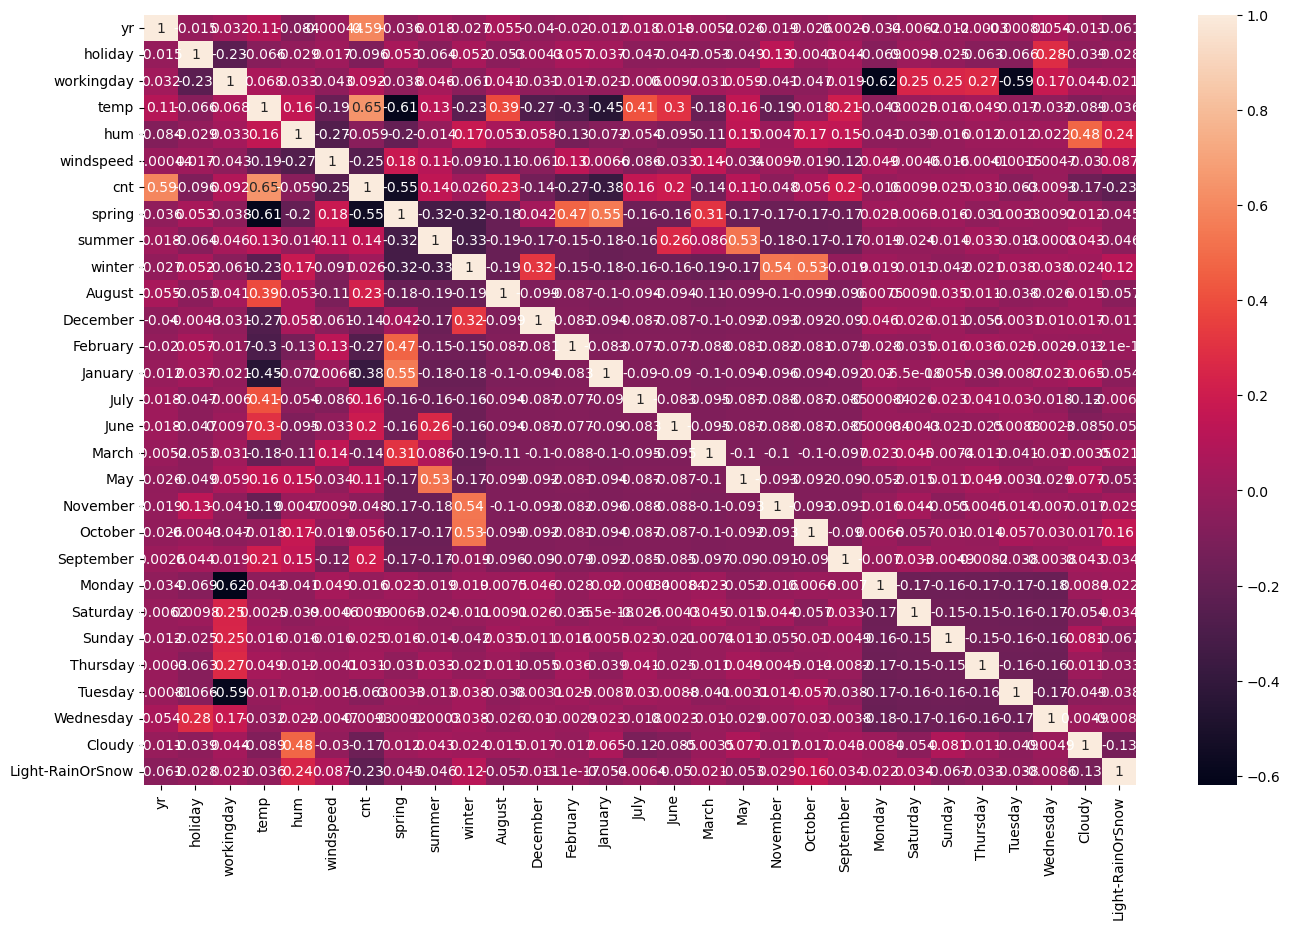

In [43]:
plt.figure(figsize = (16, 10))
sns.heatmap(days_train.corr(), annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [45]:
y_train = days_train.pop('cnt')
X_train = days_train

y_test = days_test.pop('cnt')
X_test = days_test

In [46]:
# Generic function to calculate VIF of features
def smOls(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
    
def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [47]:
## Simple linear regression using temp as it is higly corerelated
smOls(y_train,X_train['temp'])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.46e-61
Time:                        18:27:58   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

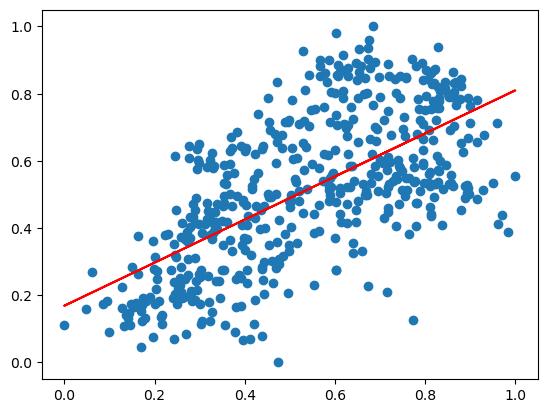

In [48]:
plt.scatter(X_train['temp'], y_train)
plt.plot(X_train['temp'],0.1690+0.6409*X_train['temp'], 'r')
plt.show()

In [49]:
## 
smOls(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.00e-181
Time:                        18:27:59   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2409      0.036  

In [50]:
calculateVIF(X_train)

Features    VIF
2         workingday  86.77
20            Monday  19.71
24           Tuesday  18.34
6             spring  10.75
8             winter   9.44
7             summer   8.27
3               temp   7.08
17          November   6.79
18           October   6.47
9             August   6.36
12           January   5.90
10          December   5.68
13              July   5.60
19         September   4.90
1            holiday   4.59
11          February   4.39
15             March   3.47
14              June   2.81
16               May   2.22
4                hum   2.05
25         Wednesday   1.78
21          Saturday   1.62
22            Sunday   1.61
23          Thursday   1.61
26            Cloudy   1.60
27  Light-RainOrSnow   1.29
5          windspeed   1.24
0                 yr   1.06

## Selecting features using Recursive feature elimination 

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 6),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 13),
 ('Sunday', False, 10),
 ('Thursday', False, 9),
 ('Tuesday', False, 7),
 ('Wednesday', False, 8),
 ('Cloudy', True, 1),
 ('Light-RainOrSnow', True, 1)]

In [56]:
selected_columns = X_train.columns[rfe.support_]

In [57]:
selected_columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'January', 'July', 'September', 'Monday', 'Cloudy',
       'Light-RainOrSnow'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [59]:
## Creating datset with columns selected using RFE
X_train = X_train[selected_columns]

##### Assessing the model with StatsModels

In [61]:
smOls(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          4.22e-191
Time:                        18:28:00   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.036  

In [62]:
calculateVIF(X_train)

Features    VIF
4                hum  29.37
3               temp  17.78
2         workingday   5.31
5          windspeed   4.73
6             spring   4.53
8             winter   3.46
7             summer   2.85
13            Cloudy   2.29
0                 yr   2.09
12            Monday   1.98
9            January   1.67
10              July   1.59
11         September   1.39
14  Light-RainOrSnow   1.24
1            holiday   1.18

### Observations
* p-value of all the variables are less than 0.05 which means the features are statistically significant
* hum,temp,windspeed have vif > 5 which can be considered as high

In [64]:
## Create model by removing hum as it has high vif and negatively correlated with cnt
X_train = X_train.drop(["hum"], axis = 1)

In [65]:
smOls(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.60e-188
Time:                        18:28:00   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1737      0.031  

In [66]:
calculateVIF(X_train)

Features   VIF
3               temp  7.07
2         workingday  5.24
4          windspeed  4.68
5             spring  3.07
6             summer  2.34
0                 yr  2.08
7             winter  1.98
11            Monday  1.97
8            January  1.62
9               July  1.59
12            Cloudy  1.58
10         September  1.35
1            holiday  1.17
13  Light-RainOrSnow  1.09

### Observations
* After dropping hum,p-value of all the variables are less than 0.05 which means all the features are statistically significant
* temp and workingday have vif > 5 which can be considered as high 

In [68]:
## Even though temp has has high VIF among it is highly correlated with cnt and not suggested to be removed.So we will generate model by removing 
## workingday which has second hightest VIF and negatively correlated with cnt
X_train = X_train.drop(["workingday"], axis = 1)

In [69]:
smOls(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.48e-186
Time:                        18:28:00   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2120      0.030  

## Residual Analysis of the train data

In [71]:
calculateVIF(X_train)

Features   VIF
2               temp  5.16
3          windspeed  4.64
4             spring  2.76
5             summer  2.24
0                 yr  2.07
6             winter  1.80
7            January  1.61
8               July  1.59
11            Cloudy  1.56
9          September  1.34
10            Monday  1.19
12  Light-RainOrSnow  1.08
1            holiday  1.05

### Observations
* After dropping workingday, p-value of all the variables are less than 0.05 which means all the features are statistically significant except for Monday which is 0.075
* temp has vif > 5 which can be considered as high 

In [73]:
## Create model by dropping Monday as it has high p-value
X_train = X_train.drop(["Monday"], axis = 1)

In [74]:
smOls(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.14e-187
Time:                        18:28:00   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2154      0.030  

In [75]:
calculateVIF(X_train)

Features   VIF
2               temp  5.13
3          windspeed  4.62
4             spring  2.75
5             summer  2.24
0                 yr  2.07
6             winter  1.78
7            January  1.61
8               July  1.59
10            Cloudy  1.56
9          September  1.34
11  Light-RainOrSnow  1.08
1            holiday  1.04

### Observations
* After dropping Monday, p-value of all the features are less than 0.05 which means all the features are statistically significant 
* temp has vif > 5 which can be considered as high

In [77]:
## Even though temp has has high VIF among it is highly correlated with cnt and not suggested to be removed.So we will generate model by removing 
## windspeed which has second hightest VIF and negatively correlated with cnt
X_train = X_train.drop(["windspeed"], axis = 1)

In [78]:
smOls(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.83e-180
Time:                        18:28:00   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1586      0.030  

In [79]:
calculateVIF(X_train)

Features   VIF
2               temp  4.28
0                 yr  2.07
3             spring  1.99
4             summer  1.94
6            January  1.60
7               July  1.59
5             winter  1.57
9             Cloudy  1.56
8          September  1.34
10  Light-RainOrSnow  1.07
1            holiday  1.04

### Observations
* After dropping workingday, p-value of all the variables are less than 0.05 which means all the features are statistically significant except for January which is 0.192
* All the features have vif < 5

In [81]:
## Create model by dropping January as it has high p-value
X_train = X_train.drop(["January"], axis = 1)

In [82]:
smOls(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.71e-181
Time:                        18:28:00   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1501      0.029  

In [83]:
calculateVIF(X_train)

Features   VIF
2              temp  4.22
0                yr  2.06
4            summer  1.94
6              July  1.58
5            winter  1.57
8            Cloudy  1.55
3            spring  1.40
7         September  1.34
9  Light-RainOrSnow  1.07
1           holiday  1.04

### Observations
* After dropping dropping, p-value of all the variables are less than 0.05 which means all the features are statistically significant
* All the features have vif < 5
* We have arrived at a decent model where model with an R-squared value of 0.82 means that approximately 82% of the variance in the dependent variable is explained by the independent variables. This suggests a strong relationship between the variables and indicates that the model provides a good fit to the data.

##  Residual analysis

In [86]:
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train).fit()
y_train_pred = lr.predict(X_train)
residual = (y_train - y_train_pred)

#### Distribution of the error terms
We need to check if the error terms are also normally distributed 

Text(0.5, 0.98, 'Error Terms')

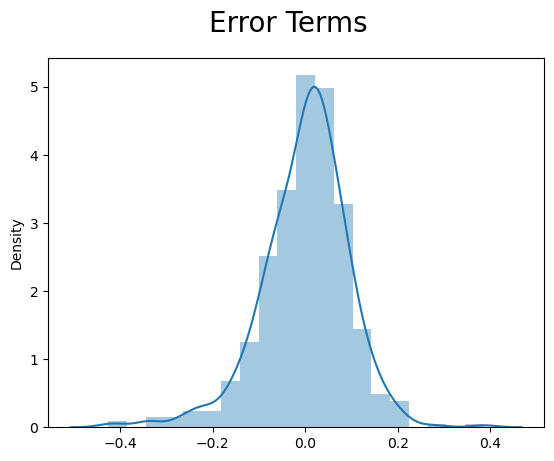

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)

### Observation
* The residuals are following the normally distributed with a mean 0.

#### Looking for patterns in the residuals

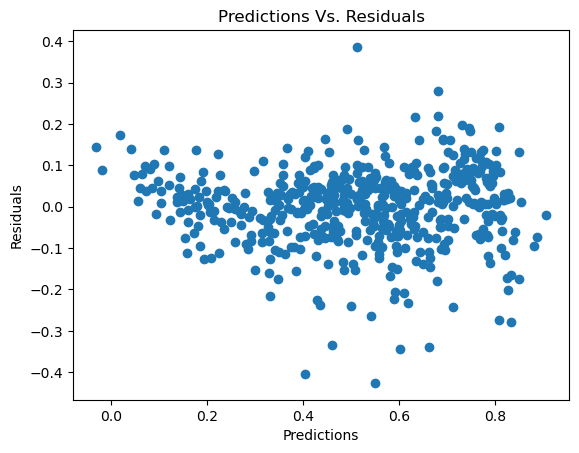

In [91]:
plt.scatter(y_train_pred,residual)
plt.title('Predictions Vs. Residuals')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

### Observation
* We can see that the points are plotted in a randomly spread, there is no pattern and points are not based on one side so there is no problem of heteroscedasticity.

## Making predictions using the final Model on test set

In [94]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test = X_test[X_train.columns]

In [95]:
y_test_pred = lr.predict(X_test)

## Model Evaluation using test data set
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

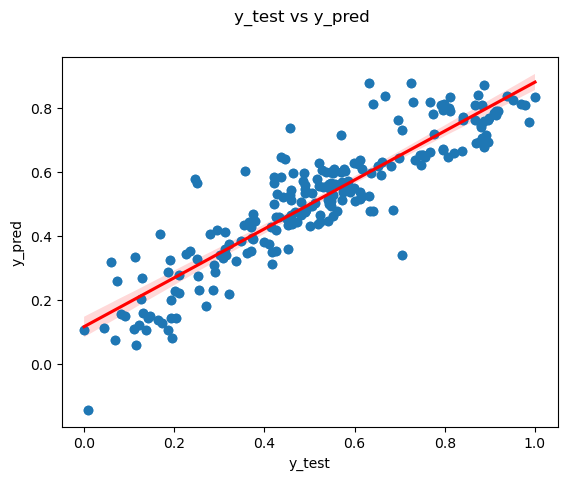

In [97]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')  

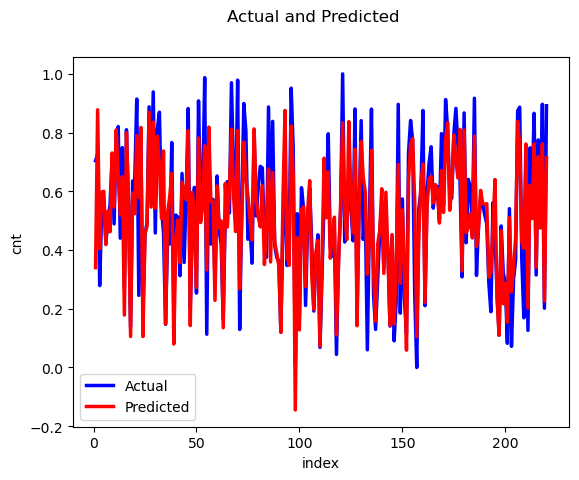

In [98]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-",label='Actual')
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-",label='Predicted')
fig.suptitle('Actual and Predicted') 
plt.xlabel('index') 
plt.ylabel('cnt') 
plt.legend(loc='best')

## R2 Score and Mean Sqaured Error

In [100]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
data = {
  "R-squared": [r2_train,r2_test],
  "Mean Sqaured Error": [train_mse,test_mse]
}
df = pd.DataFrame(data, index = ["Train Data Set", "Test Data Set"])
print(df) 

                R-squared  Mean Sqaured Error
Train Data Set    0.82382            0.008856
Test Data Set     0.80527            0.011119


## Equation for best fit line
### cnt = (0.2326 x yr)-(0.1003 x holiday)+(0.5029 x temp)-(0.0766 x spring)+(0.0367 x spring)+(0.0829 x winter)-(0.0523 x July)+(0.0812 x September)-(0.0785 x Cloudy)-(0.2989 x Light-RainOrSnow) 

## Conclusion

* The R-squared value of the train set is 82.38% and test is 80.52% which indicates model explains the variance quite accurately on the test set.
* The mean squared value of both train and test data set is  is almost 0 which indicates model explains the variance quite accurately on the test set.
* Rental count depends year,holiday,temperature,spring,spring,winter,July,September,Cloudy,Light-RainOrSnow